# Data generator for a mixture of Gaussian peaks + linear baseline

\begin{equation}
\Large y_n = f(x_n) = \sum\limits_{m=1}^M [A_m \cdot e^{-\frac{(x_n-\mu_m)^2}{2\cdot\sigma_m^2}}] + \alpha\cdot{x} + \beta + \epsilon
\end{equation}

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.8



# Data generation

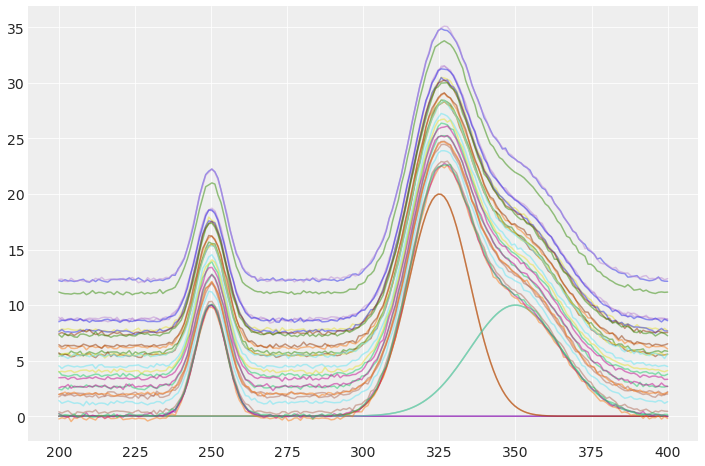

In [2]:
# number of wavelengths (x-values)
size = 200

# number of observations
obs = 30

# noise value
_epsilon = .1

# number of basis peaks (components)
npeaks = 3

# parameter values (class A)
_mu_a = [250, 325, 350]
_sigma_a = [5, 10, 15]
_amp_a = [10, 20, 10]

# parameter values (class B)
_mu_b = [250, 325, 350]
_sigma_b = [5, 10, 15]
_amp_b = [10, 20, 10]

# labels
Yl = []

# Predictor variable
X = np.linspace(200, 400, size)

# individual peaks (class A)
Za = np.zeros((npeaks, size))
for i in range(len(Za)):
    Za[i,:] = np.array(_amp_a[i] * np.exp(-(X-_mu_a[i])**2/(2*_sigma_a[i]**2)))  

# individual peaks (class B)
Zb = np.zeros((npeaks, size))
for i in range(len(Zb)):
    Zb[i,:] = np.array(_amp_b[i] * np.exp(-(X-_mu_b[i])**2/(2*_sigma_b[i]**2)))  
    
# total curve is the sum of the components
Yt = np.zeros((obs, size))
for idx in range(obs):
    # random values for alpha and beta
    #alpha = np.random.uniform(0,0.05)
    alpha = 0.0
    #beta = np.random.uniform(0,5)
    beta = 2.5 + 2 * np.random.randn()
    #gamma = np.random.uniform(5,10)
    gamma = 7.5 + 2 * np.random.randn()
    if idx % 2 == 0:
        Yt[idx,:] = Za.sum(axis=0) + np.random.randn(size)*_epsilon + alpha * X + gamma
        Yl.append('A')
    else:
        Yt[idx,:] = Zb.sum(axis=0) + np.random.randn(size)*_epsilon + alpha * X + beta
        Yl.append('B')

Y = np.vstack([Za, Zb, Yt])

plt.figure(figsize=(12, 8))
for idx in range(len(Y)):
    plt.plot(X, Y[idx,:], "-", alpha=0.5);

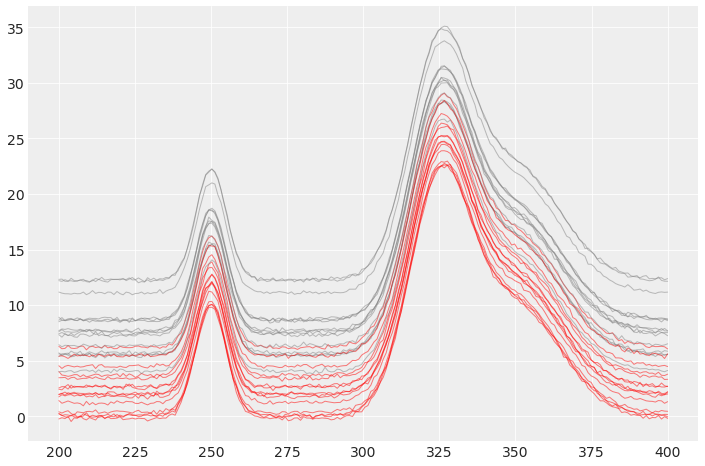

In [3]:
plt.figure(figsize=(12, 8))
for idx in range(len(Yt)):
    if Yl[idx] == "A":
        plt.plot(X, Yt[idx,:], "-", alpha=.5, color='gray', linewidth=1);
    else:    
        plt.plot(X, Yt[idx,:], "-", alpha=.5, color='red', linewidth=1);

# Convert to dataframe and save

In [4]:
# create dataframe
X = np.around(X, 1)
data = pd.DataFrame(data=Yt,columns=X)

# add label column
ll = pd.Series(Yl)
data = data.assign(label=pd.Series(ll))

# shuffle data
data = data.sample(frac=1, random_state=42)

data.head()

,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,...,392.0,393.0,394.0,395.0,396.0,397.0,398.0,399.0,400.0,label
27,2.545923,2.668363,2.657024,2.851379,2.520851,2.704751,2.643598,2.683404,2.641305,2.605653,...,2.817922,2.826374,2.825643,2.937057,2.679127,2.683990,2.989236,2.740263,2.673075,B
15,6.284966,6.076233,6.102970,6.360529,6.125436,6.094357,6.135805,6.314146,6.299904,5.973932,...,6.480991,6.250693,6.174283,6.318603,6.264934,6.271055,6.295778,6.248343,6.059775,B
23,1.745673,1.934273,1.828896,1.922397,1.947405,1.809127,1.904710,1.837310,1.961735,1.738058,...,1.959786,2.011799,1.930415,1.764971,1.706125,1.966981,1.842048,1.940979,1.998808,B
17,3.464210,3.472171,3.496687,3.311205,3.470825,3.506792,3.319324,3.370807,3.412752,3.408787,...,3.707503,3.652353,3.507816,3.606701,3.616940,3.514438,3.540873,3.305226,3.323685,B
8,5.703039,5.433213,5.601476,5.490747,5.348318,5.391310,5.557095,5.508253,5.456263,5.557896,...,5.838978,5.651023,5.615220,5.555531,5.373756,5.568259,5.488507,5.526666,5.573521,A


In [5]:
data.to_csv('./dummy_data_e.csv', index=False)